<h1 style="text-align: center;"><strong>1. Soluci&oacute;n de Ecuaciones No Lineales</strong></h1>

<h2 style="text-align: center;"><span style="text-decoration: underline; color: #008080;"><strong>Algoritmos</strong></span></h2>

[<strong>M&eacute;todo 1: M&eacute;todo de la Bisecci&oacute;n</strong>](#biseccion)

[<strong>M&eacute;todo 2: Nombre&nbsp;</strong>](#metodo2)

<strong>M&eacute;todo 3:</strong>

<a id='biseccion'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 1:</strong> M&eacute;todo de la Bisecci&oacute;n</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>


$\begin{equation}
I_{k+1} = \left[a_{k+1},b_{k+1}\right] = \left\{ \begin{array}{lcc}
            \left[a_{k},x_{k}\right] &   si  & f(a_{k})f(x_{k}) < 0 \\
             \left[x_{k},b_{k}\right] &   si  & f(a_{k})f(x_{k}) > 0
             \end{array}
   \right.
\end{equation}$


<h3><strong>b) Valores Iniciales</strong></h3>



$\begin{equation}
    \left[a,b\right] \hspace{0.2cm} y \hspace{0.2cm} f(x) \hspace{0.2cm} continua
\end{equation}$

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

<div class="alert alert-block alert-success row">
    <div class="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Ventajas:</strong>
                </span>
            </span>
        </p>
        <li>Siempre converge</li>
        <li>Útil como aproximación inicial de otros métodos</li>
    </div>
    <div class ="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Desventajas:</strong>
                </span>
            </span>
        </p>
        <li>Convergencia Lenta</li>
        <li>No tiene en cuenta la magnitud d elos valores de la función en las aproximaciones calculadas, solo tiene en cuneta el sifgno de f(x), por lo que hace que una aproximación intermedia, mejor que la respuesta final, pase desapercibida  </li>
    </div>
</div>

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

![](bpseu.JPG)

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [2]:
function [x,k,error]=biseccion3(f,a,b,tol,iterMax)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la bisección
    %
    %Sintaxis:  biseccion1(f,a,b,tol,iterMax)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f
    %            a,b = son los extremos del intervalo [a,b]
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iterMax = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            x = aproximación del cero de la función f
    %            k = número de iteraciones realizados
    %            error =  |f(x)|


    pkg load symbolic
    
    f1 = matlabFunction(sym(f));  % Se obtiene la funcion
    %df = matlabFunction(diff(sym(funcion)));  % Se calcula la derivada
    
    if f1(a)*f1(b)>0
        x=[]; k=[]; error=[];
        display('El teorema de Bolzano no se cumple, es decir, f(a)*f(b)>0')
    else
        k=0;
        error=tol+1;
        e=[];
        while and(error>tol,k<iterMax)
            k=k+1;
            x=(a+b)/2;
            error=abs(f1(x));
            e=[e error];
            if f1(a)*f1(x)<0
                b=x;
            else
                a=x;
            end
        end
        plot(1:k,e)
    end
end

%help biseccion3


<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [4]:
def biseccion1(f,a,b,tol,iterMax):

    """
    Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la bisección
    
    Sintaxis:  biseccion1(f,a,b,tol,iterMax)
    
    Parámetros Iniciales: 
                f = una  cadena de caracteres (string) que representa a la función f
                a,b = son los extremos del intervalo [a,b]
                tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
                iterMax = cantidad de iteraciones máximas
                
    Parámetros de Salida: 
                [x_k,k,error], donde                
                x_k = aproximación del cero de la función f
                k = número de iteraciones realizados
                error =  |f(x_k)|
    """
    
    
    from sympy import  sympify
    import matplotlib.pyplot

    
    funcion = sympify(f)
    fa=funcion.subs({'x': a})
    fb=funcion.subs({'x': b})
    
    if fa*fb>0:
        x=[]
        k=[]
        error=[]
        display('El teorema de Bolzano no se cumple, es decir, f(a)*f(b)>0')
    else:
        error=tol+1
        k=0
        it=[]
        er=[]
        while error>tol and k<iterMax:
            k=k+1
            x=(a+b)/2
            fa=funcion.subs({'x': a})
            fx=funcion.subs({'x': x})
            error=abs(fx)
            it.append(k)
            er.append(error)
            if fa*fx<0:
                b=x                
            else:
                a=x   
    matplotlib.pyplot.plot(it, er)
    return [x,k,float(error)]

"""help(biseccion1)"""

'help(biseccion1)'

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

Utilice el método de bisección para aproximar la solucion de la ecuación $e^{x}-x-2=0$, en el intervalo $[0,2]$ para una tolerancia de $1x10^{-4}$. El resultado de la operación se da con 8 iteraciones y la aproximacion es $x_7 = 1.1484375$ 

tolerancia =  0.00010000
Symbolic pkg v2.8.0: Python communication link active, SymPy v1.4.
x =  1.1462
k =  15
error =  0.000030092


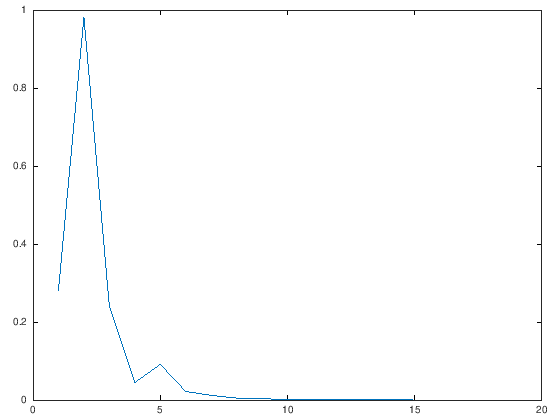

In [3]:
% Solución del ejemplo utilizando GNU Octave
a=0;
b=2;
iterMax=50;
tolerancia=1*(10**-4)
[x,k,error]=biseccion3('exp(x)-x-2',a,b,tolerancia,iterMax)

[1.14617919921875, 15, 3.00923282878784e-5]


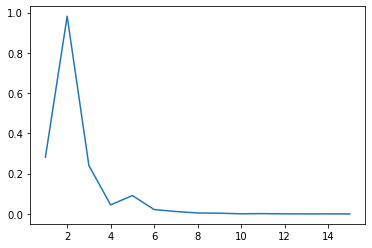

In [42]:
#Solución del ejemplo utilizando GNU Octave
a=0;
b=2;
iterMax=50;
tolerancia=1*(10**-4)
resultado=biseccion1('exp(x)-x-2',a,b,tolerancia,iterMax)
print(resultado)

<a id='metodo2'></a>
<h2><span style="color: #993300;"><strong>M&eacute;todo 2: Newton-Raphson </strong> </span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>


$ \begin{equation}
       \left\{  \begin{array}{lcc}
                 x_{k+1} = x_{k}- \frac{f(x_{k})}{f^{\prime}(x_{k})} &  donde  & f^{\prime}(x_{k}) \neq 0 \text{ para todo }  k \geq 0 \\
                 x_{0} \in \mathbb{R} & \text {valor inicial} 
                \end{array}
     \right.
    \end{equation}$


<h3><strong>b) Valores Iniciales</strong></h3>

Algún valor $x_{0}$ dado

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

<div class="alert alert-block alert-success row">
    <div class="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Ventajas:</strong>
                </span>
            </span>
        </p>
        <li> Converge muy rápido</li>
        <li>Proporciona buena precisión en los resultados.</li>
    </div>
    <div class ="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Desventajas:</strong>
                </span>
            </span>
        </p>
        <li>Tiene como restricción el cálculo de la derivada de una función.</li>
        <li>No existe un criterio general de Convergencia </li>
    </div>
</div>

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

![](npseu.JPG)

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [5]:
function [xn, err, iter, fx]= nr(f,x0,tol,maxIter)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de Newton-Raphson
    %Devuelve el valor de la raíz más aproximada según la tolerancia dada
    %
    %Sintaxis:  nr(f,x0,tol,maxIter)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f
    %            x0 = Valor inicial dado
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iterMax = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            x = aproximación del cero de la función f
    %            k = número de iteraciones realizados
    %            error =  |f(x)|


  f1 = matlabFunction(sym(f));  % Se obtiene la funcion
  df = matlabFunction(diff(sym(f1)));  % Se calcula la derivada
  xNext = x0;
  figure
  hold on
  for iter=0:maxIter
    xn = xNext;
    dfx = df(xn);
    if dfx == 0
      disp("Error: Division by zero");
      return
    endif
    fx = f1(xn);
    xNext = xn - fx/dfx;
    err = abs(fx);
    if err <= tol
      break
    endif
    plot(iter, err, 'ro');
    title("Newton-Raphson Method");
    xlabel("Iterations")
    ylabel("Error")
  endfor
endfunction

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [6]:
def nr(f,x0,tol,maxIter):
    """
    Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de Newton-Raphson
    Devuelve el valor de la raíz más aproximada según la tolerancia dada
    
    Sintaxis:  nr(f,x0,tol,maxIter)
    
    Parámetros Iniciales: 
                f = una  cadena de caracteres (string) que representa a la función f
                x0 = Valor inicial dado
                tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
                iterMax = cantidad de iteraciones máximas
                
    Parámetros de Salida: 
                [xn,float(err),iter], donde                
                xn = aproximación del cero de la función f
                iter = número de iteraciones realizados
                err =  |f(x_k)|
    """
    
    
    import sympy
    import matplotlib.pyplot
    x,y,z = sympy.symbols ('x y z')  #Define x,y,z como variables de una funcion
    f1 = sympy.sympify(f) 
    df = f1.diff(x);
    xNext = x0
    k=[]
    error=[]
    iteracion=0
    for iter in range(0, maxIter):
        xn = xNext
        dfx = float(sympy.sympify(df).subs(x,xn))
        if (dfx == 0):
          print("Error: Division by zero")
          return
        fx = float(sympy.sympify(f1).subs(x,xn))
        xNext = xn - fx/dfx;
        err = abs(fx);
        error.append(err)
        k.append(iter)
        iteracion=iter
        if (err <= tol or err==0):
            break
        
    matplotlib.pyplot.plot(k, error)
    return [xn,float(err),iter]

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

Usando el método iterativo de Newton, determine una solución de la
ecuación $e^{x}-1/x=0$, con una tolerancia de $10^{-4}$ y $x_0=1$. la aproximación de la solución de la ecuación es $0.56714329$

tolerancia =  0.00010000
xn =  0.56714
err =  0.0000034595
iter =  3


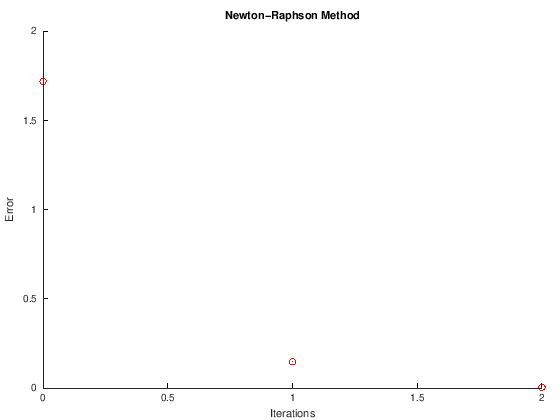

In [7]:
% Solución del ejemplo utilizando GNU Octave
x0=1;
b=2;
iterMax=50;
tolerancia=1*(10**-4)
[xn, err, iter]=nr('exp(x)-(1/x)',x0,tolerancia,iterMax)

[0.5671425803617602, 3.4594823934419594e-06, 3]


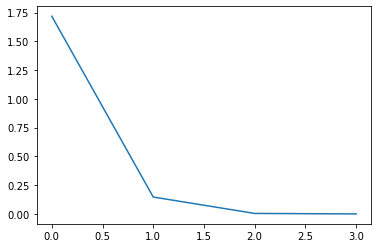

In [44]:
# Solución del ejemplo utilizando Python
x0=1;
b=2;
iterMax=50;
tolerancia=1*(10**-4)
y=nr('exp(x)-(1/x)',x0,tolerancia,iterMax)
print(y)

# <a id='metodo2'></a>
<h2><span style="color: #993300;"><strong>M&eacute;todo 3: Método de la Secante </strong> </span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

$    
\begin{equation}
    x_{k+1} = x_{k}- \left(\frac{ x_{k}- x_{k-1}} {f(x_{k}) -f(x_{k-1}) } \right)f(x_{k})
\end{equation}
$

para k= 1,2....., donde $x_{0}$ y $x_{1}$ son los valores iniciales y se asume que $f(x_{k})-f(x_{k}) \neq 0$ para todo $k \geq 1$


<h3><strong>b) Valores Iniciales</strong></h3>

$x_{0}$ y $x_{1}$ 

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

<div class="alert alert-block alert-success row">
    <div class="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Ventajas:</strong>
                </span>
            </span>
        </p>
        <li>Se puede aplicar cuando la función f(x) es demasiado compleja como para obtener su derivada</li>
        <li>Beneficioso en aspectos computacionales, donde los algoritmos de obteción de derivadas son númericos y no algebraicos.</li>
    </div>
    <div class ="column">
        <p>
            <span style="text-decoration: underline;">
                <span style="text-decoration: underline;">
                    <strong>Desventajas:</strong>
                </span>
            </span>
        </p>
        <li>Su velocidad de convergencia es emnor al de otros métodos como Newton-Raphson</li>
        <li>Tiene el riesgo de que no converga y no se pueda hallar la raíz.</li>
    </div>
</div>

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

![](spseud.JPG)

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [8]:
function [xk, err, iter]= secanteO(f,x0,x1,tol,maxIter)

    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la Secante
    %Devuelve el valor de la raíz más aproximada según la tolerancia dada
    %
    %Sintaxis:  secanteO(f,x0,x1,tol,maxIter)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f
    %            x0 = Primer valor de la iteracion
    %            x1 = Segundo  valor de la iteracion       
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iterMax = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            xk = aproximación del cero de la función f
    %            iter = número de iteraciones realizados
    %            error =  |f(x)|


  f1 = matlabFunction(sym(f));  % Se obtiene la funcion
  k = 2;
  figure
  hold on
  for iter=0:maxIter
    xk = x1 - f1(x1) * ((x1 - x0)/(f1(x1) - f1(x0)));
    err = abs(f1(xk));
    if (err <= tol)
      break;
    endif
    plot(iter, err, 'ro');
    title("Secant Method");
    xlabel("Iterations")
    ylabel("Error")
  endfor
endfunction

<h3><strong>f) C&oacute;digo en Python</strong></h3>

In [9]:
def secante(f,x0,x1,tol,iterMax):   
    """
    Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de Newton-Raphson
    Devuelve el valor de la raíz más aproximada según la tolerancia dada
    
    Sintaxis:  nr(f,x0,tol,maxIter)
    
    Parámetros Iniciales: 
                f = una  cadena de caracteres (string) que representa a la función f
                x0 = Primer valor dado
                x1 = Segundo valor dado
                tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
                iterMax = cantidad de iteraciones máximas
                
    Parámetros de Salida: 
                [xn,float(err),iter], donde                
                xn = aproximación del cero de la función f
                iter = número de iteraciones realizados
                err =  |f(x_k)|
    """
    from sympy import sympify
    import matplotlib.pyplot
    x,y,z = sympy.symbols ('x y z') #Define x,y,z como variables de una funcion
    funcion = sympy.sympify(f) 
    k = 2
    error = []
    iteraciones=[]
    xk=0
    for _iter in range(1, iterMax):
        xk = float(x1 - (funcion.subs({"x": x1}) * (x1 - x0)) /
                   (funcion.subs({"x": x1}) - funcion.subs({"x": x0})))
        print(float(xk))
        
        err = abs(float(funcion.subs({"x": xk})))
        iteraciones.append(k)
        error.append(err)
        if (err <= tol):
            break 
        k=k+1

        x0=x1
        x1=xk
    matplotlib.pyplot.plot(iteraciones, error)
    return [xk,k,err]

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

Considere la ecuación $e^{-x^{2}}=0$, y utilice el metodo de la secante para aproximar una solución de esta ecuación con una tolerancia de $ tol = 10^{-2}$ y valores iniciales de $x0=0$ y $x1=1$. Con dicha tolerancia su aproximación es $0.652917...$

tolerancia =  0.010000
xn =  0.61270
err =  0.074314
iter =  50


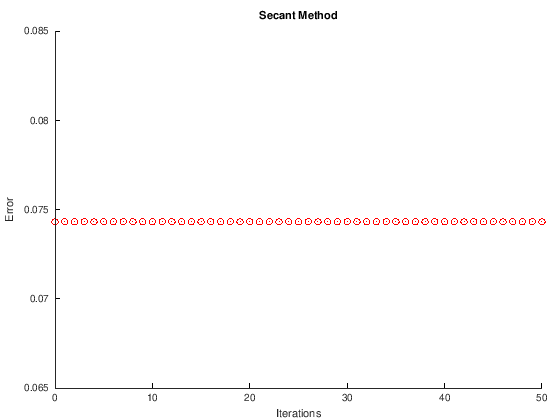

In [80]:
% Solución del ejemplo utilizando GNU Octave
x0=0;
x1=1;
iterMax=50;
tolerancia=1*(10**-2)
[xn, err, iter]=secanteO('exp(-x**2)-x',x0,x1,tolerancia,iterMax)

0.6126998367802821
0.6534421332877829


[0.6534421332877829, 3, 0.0009698520541936428]

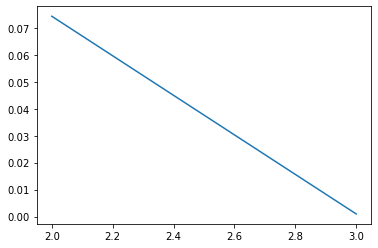

In [69]:
#Solucion en Python
x0=0;
x1=1;
iterMax=50;
tolerancia=1*(10**-2)
iterMax=50
secante('exp(-x**2)-x',x0,x1,tolerancia,iterMax)